In [0]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/drive/My Drive/OG datasets/Master_Table_Final.csv")
df.head()

,aisle_id,department_id,product_id,product_name,department,aisle,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,27,5,18561,805,alcohol,beers coolers,940035,67973,train,19,6,11,7.0,5,1
1,27,5,18561,805,alcohol,beers coolers,640491,33471,train,18,0,10,30.0,1,1
2,27,5,18561,805,alcohol,beers coolers,238150,191231,train,6,2,11,11.0,3,1
3,120,16,7494,0 Fat Black Cherry Greek Yogurt y,dairy eggs,yogurt,3397097,95710,train,50,0,8,7.0,15,1
4,120,16,3756,0 Fat Blueberry Greek Yogurt,dairy eggs,yogurt,562445,196770,train,87,4,14,3.0,7,0


In [0]:
clv_df = df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

In [6]:
print(clv_df)

       user_id  order_number
0            1            11
1            2            15
2            5             5
3            7            21
4            8             4
...        ...           ...
90264   206199            20
90265   206200            24
90266   206203             6
90267   206205             4
90268   206209            14

[90269 rows x 2 columns]


In [0]:
clv_df.rename(columns = {'order_number': 'Total Visits'}, inplace=True)

In [8]:
clv_df

,user_id,Total Visits
0,1,11
1,2,15
2,5,5
3,7,21
4,8,4
...,...,...
90264,206199,20
90265,206200,24
90266,206203,6
90267,206205,4


In [0]:
import random
clv_df['Total Price'] = np.random.randint(100,1200,size=90269)/10

In [10]:
clv_df['Total Price'].value_counts()

113.4    111
114.4    110
41.3     107
94.9     106
49.8     106
        ... 
23.8      59
50.3      59
59.9      59
10.1      58
42.1      58
Name: Total Price, Length: 1100, dtype: int64

In [11]:
clv_df.head()

,user_id,Total Visits,Total Price
0,1,11,97.0
1,2,15,13.9
2,5,5,28.5
3,7,21,40.6
4,8,4,100.9


In [0]:
clv_df['Total Profit'] = np.random.randint(2,9,size=90269)/10

In [13]:
clv_df

,user_id,Total Visits,Total Price,Total Profit
0,1,11,97.0,0.8
1,2,15,13.9,0.5
2,5,5,28.5,0.8
3,7,21,40.6,0.6
4,8,4,100.9,0.7
...,...,...,...,...
90264,206199,20,28.1,0.6
90265,206200,24,102.3,0.3
90266,206203,6,104.9,0.5
90267,206205,4,21.8,0.4


In [0]:
clv_df['Customer Lifetime value']=(clv_df['Total Price']*clv_df['Total Profit']*clv_df['Total Visits']).astype(int)

In [15]:
clv_df 

,user_id,Total Visits,Total Price,Total Profit,Customer Lifetime value
0,1,11,97.0,0.8,853
1,2,15,13.9,0.5,104
2,5,5,28.5,0.8,114
3,7,21,40.6,0.6,511
4,8,4,100.9,0.7,282
...,...,...,...,...,...
90264,206199,20,28.1,0.6,337
90265,206200,24,102.3,0.3,736
90266,206203,6,104.9,0.5,314
90267,206205,4,21.8,0.4,34


In [0]:
import matplotlib.pyplot as plt

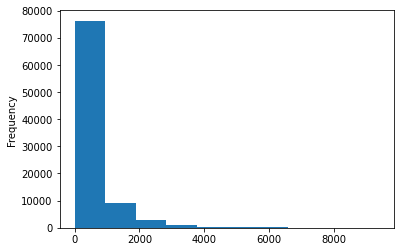

In [19]:
clv_df['Customer Lifetime value'].plot(kind='hist')

In [0]:
Membership = [clv_df['Customer Lifetime value'].between(0, 500), 
            clv_df['Customer Lifetime value'].between(500, 1500), 
            clv_df['Customer Lifetime value'].between(1500, 3000),
            clv_df['Customer Lifetime value'].between(3000, 10000)]
values = ['Regular', 'Silver', 'Gold', 'Platinum']

clv_df['CLV_Category'] = np.select(Membership, values, 'Platinum' )

In [0]:
Count['Customer Lifetime value'].value_counts()

168     227
120     227
87      226
95      225
90      223
       ... 
6822      1
4711      1
4455      1
4391      1
3678      1
Name: Customer Lifetime value, Length: 4160, dtype: int64

In [22]:
clv_df.head(100)

,user_id,Total Visits,Total Price,Total Profit,Customer Lifetime value,CLV_Category
0,1,11,97.0,0.8,853,Silver
1,2,15,13.9,0.5,104,Regular
2,5,5,28.5,0.8,114,Regular
3,7,21,40.6,0.6,511,Silver
4,8,4,100.9,0.7,282,Regular
...,...,...,...,...,...,...
95,215,6,22.2,0.7,93,Regular
96,217,12,53.3,0.8,511,Silver
97,219,34,23.0,0.8,625,Silver
98,222,71,116.9,0.7,5809,Platinum


In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


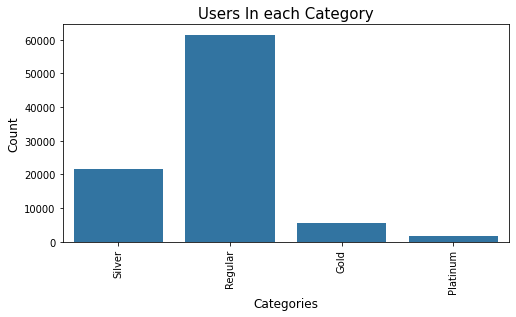

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x="CLV_Category", data=clv_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Users In each Category", fontsize=15)
plt.show()

In [29]:
clv_df['CLV_Category'].value_counts()


Regular     61534
Silver      21561
Gold         5460
Platinum     1714
Name: CLV_Category, dtype: int64

In [30]:
clv_df.head(100)

,user_id,Total Visits,Total Price,Total Profit,Customer Lifetime value,CLV_Category
0,1,11,97.0,0.8,853,Silver
1,2,15,13.9,0.5,104,Regular
2,5,5,28.5,0.8,114,Regular
3,7,21,40.6,0.6,511,Silver
4,8,4,100.9,0.7,282,Regular
...,...,...,...,...,...,...
95,215,6,22.2,0.7,93,Regular
96,217,12,53.3,0.8,511,Silver
97,219,34,23.0,0.8,625,Silver
98,222,71,116.9,0.7,5809,Platinum


In [0]:
clv_df.to_csv("Customer_Lifetime_Ratio")